PURPOSE

The primary objective of this notebook is to perform behavioral mining and segmentation on a telecom customer dataset. By analyzing historical service usage, billing, and support interactions, we aim to identify distinct behavioral traits and customer groups and understand which behaviors are most strongly associated with churn.

DATASET OVERVIEW

Source: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

Features: The dataset includes customer information such as service plans, call usage, billing charges, and customer service interactions. Key columns include:

International plan, Voice mail plan, Number vmail messages - plan and messaging details

Total day/eve/night minutes, calls, and charges - usage and billing metrics

Total intl minutes, calls, and charges - international usage and costs

Customer service calls - support interactions

Churn - whether the customer left the service - target variable

import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_ds =pd.read_csv(r'/content/drive/My Drive/Telecom churn/churn-bigml-80.csv')
test_ds =pd.read_csv(r'/content/drive/My Drive/Telecom churn/churn-bigml-20.csv')

train_ds.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
train_ds.shape , test_ds.shape

((2666, 20), (667, 20))

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


Check the class balance of the target

In [ ]:
churn_counts = train_ds['Churn'].value_counts()
print(churn_counts)
print("churn percentage:", train_ds['Churn'].value_counts(normalize=True) * 100)

Churn
False    2278
True      388
Name: count, dtype: int64
churn percentage: Churn
False    85.446362
True     14.553638
Name: proportion, dtype: float64


Use KDE plots to visualize the overlap between customers who stay and those who leave across all numerical features.

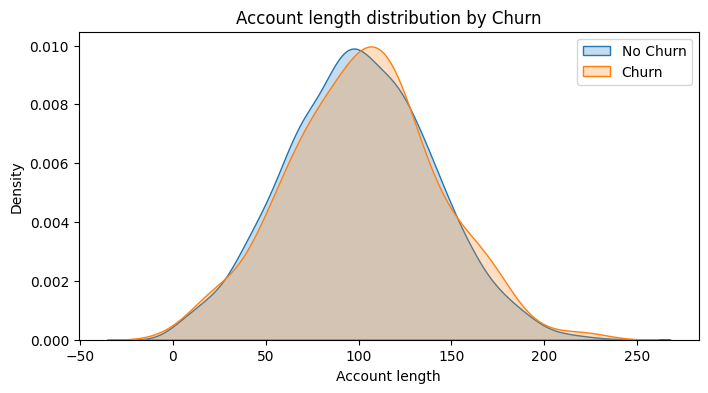

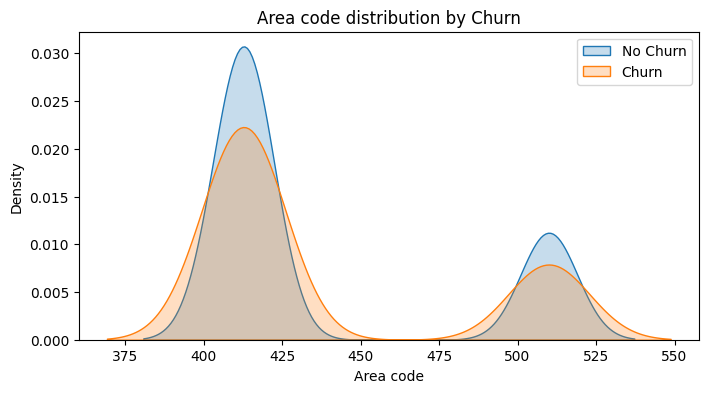

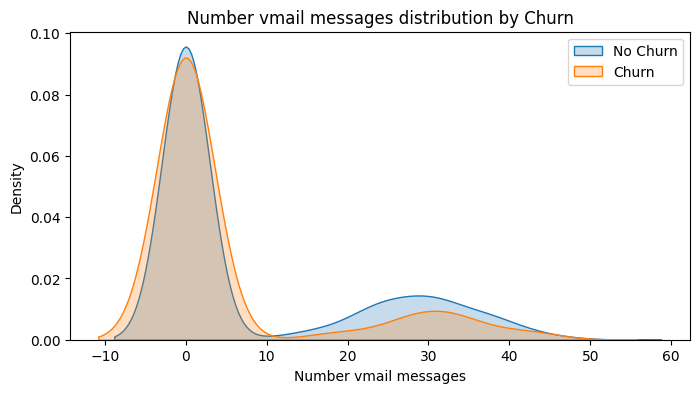

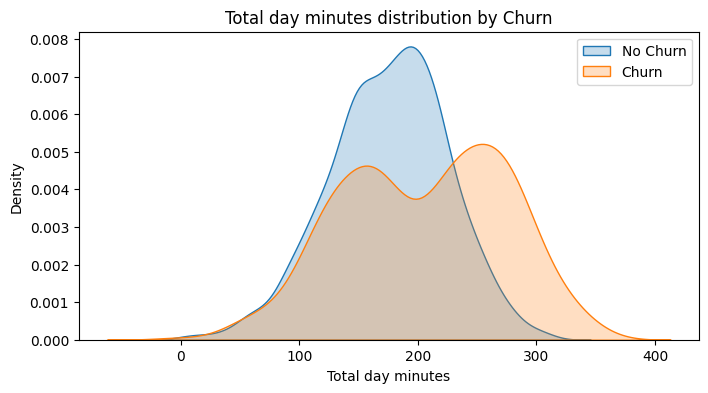

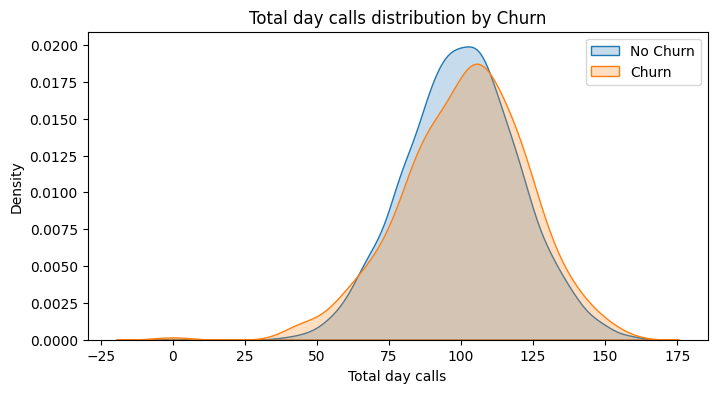

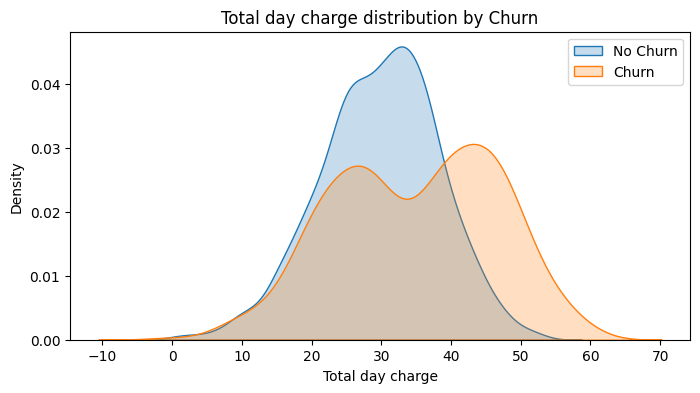

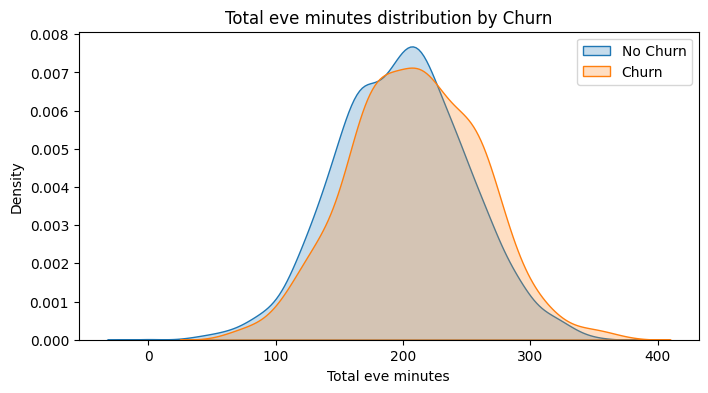

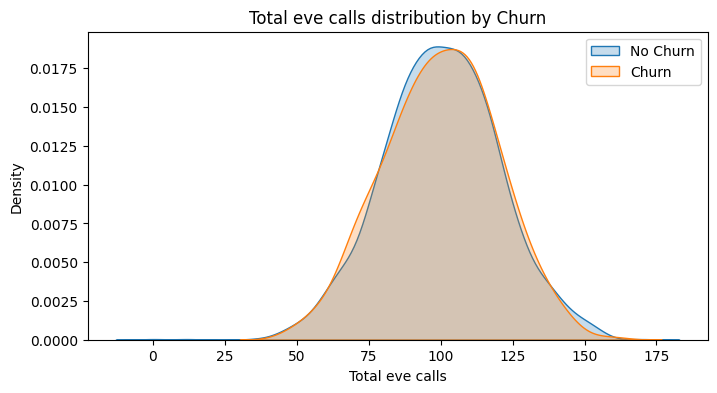

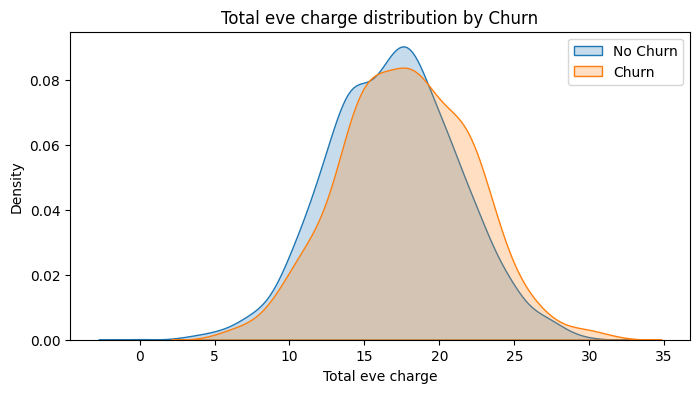

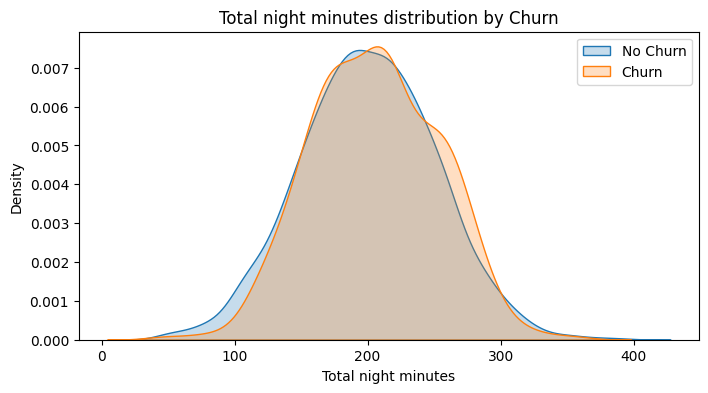

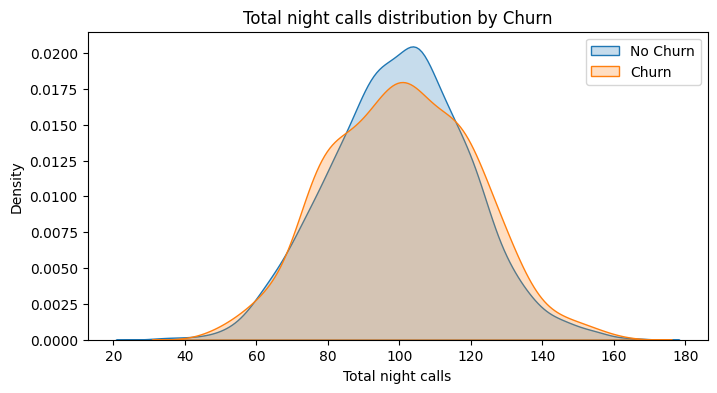

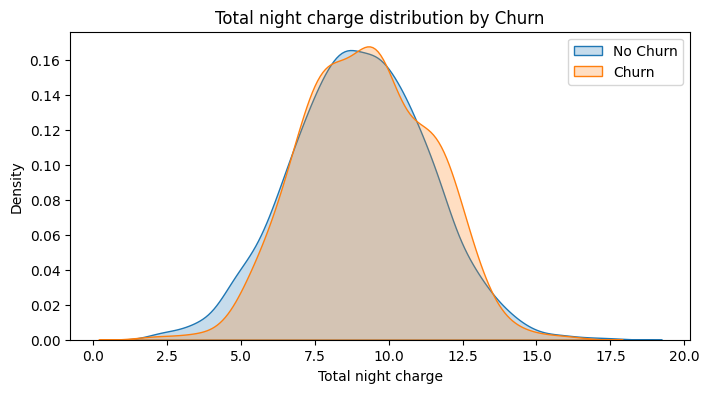

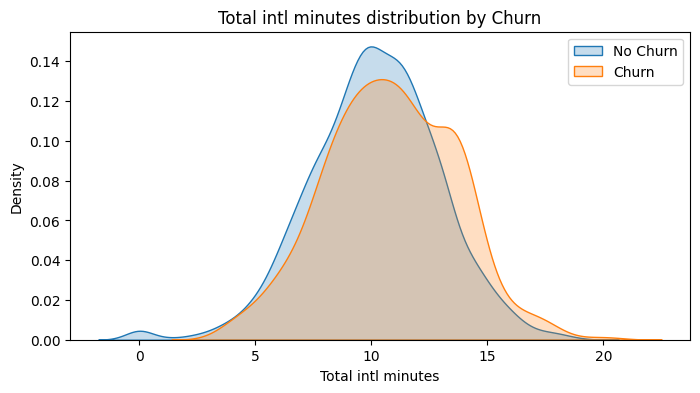

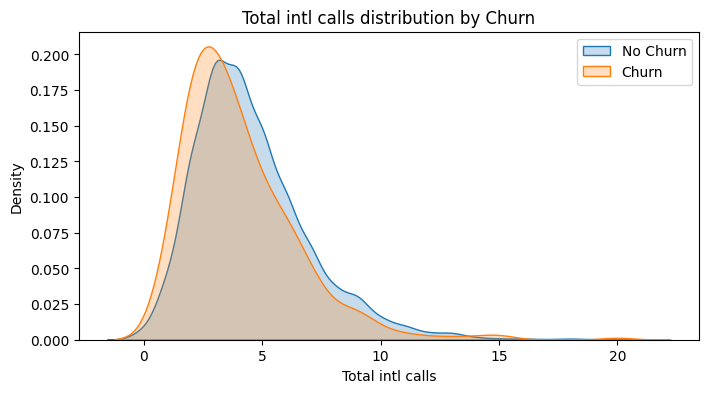

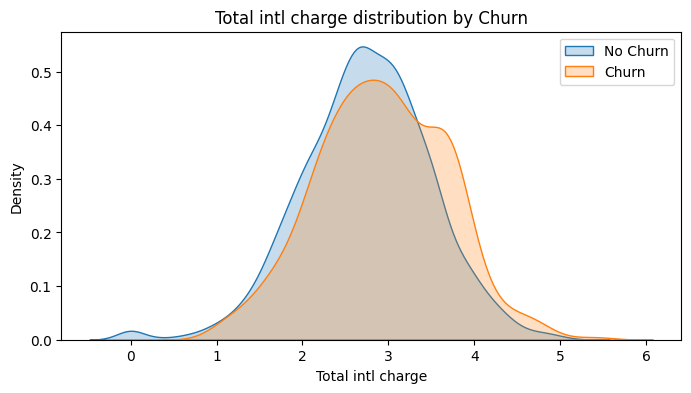

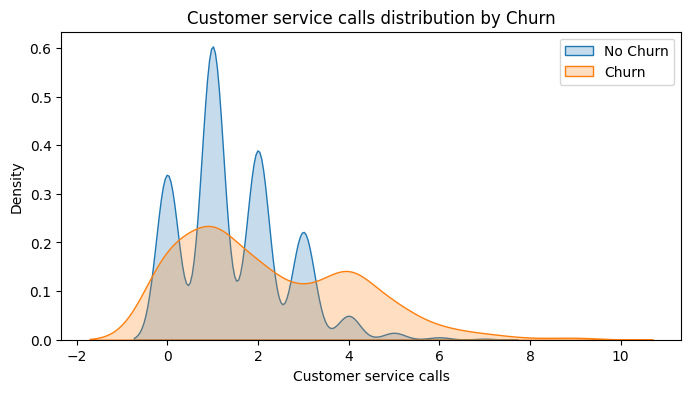

In [ ]:
num_features = train_ds.select_dtypes(include=[np.number]).columns


# Loop over numeric features
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(train_ds[train_ds['Churn']==False][feature], label='No Churn', fill=True)
    sns.kdeplot(train_ds[train_ds['Churn']==True][feature], label='Churn', fill=True)
    plt.title(f'{feature} distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
train_ds.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [ ]:
summary = ( train_ds.groupby('Churn')[num_features].agg(['mean', 'median', 'std']).T)
summary

Churn                               False       True 
Account length         mean    100.330992  102.319588
                       median  100.000000  103.000000
                       std      39.458936   40.184599
Area code              mean    437.420983  437.543814
                       median  415.000000  415.000000
                       std      42.524236   42.556855
Number vmail messages  mean      8.507463    5.170103
                       median    0.000000    0.000000
                       std      13.830160   11.876493
Total day minutes      mean    175.104346  205.181186
                       median  177.900000  214.950000
                       std      50.105334   68.490213
Total day calls        mean    100.159350  101.195876
                       median  100.000000  103.000000
                       std      19.681914   21.705279
Total day charge       mean     29.768266   34.881340
                       median   30.240000   36.540000
                       std       8.517839   11.643479
Total eve minutes      mean    198.853380  209.385309
                       median  199.550000  209.000000
                       std      50.818954   50.863718
Total eve calls        mean    100.036435   99.948454
                       median  100.000000  100.500000
                       std      20.258800   19.605474
Total eve charge       mean     16.902809   17.797861
                       median   16.965000   17.765000
                       std       4.319614    4.323327
Total night minutes    mean    200.464091  205.307216
                       median  200.000000  204.950000
                       std      51.284496   47.565157
Total night calls      mean    100.007902  100.682990
                       median  100.000000  101.000000
                       std      19.307282   20.074667
Total night charge     mean      9.020975    9.238892
                       median    9.000000    9.225000
                       std       2.307779    2.140617
Total intl minutes     mean     10.137840   10.819330
                       median   10.200000   10.800000
                       std       2.779622    2.771824
Total intl calls       mean      4.538191    4.051546
                       median    4.000000    3.000000
                       std       2.447533    2.468912
Total intl charge      mean      2.737709    2.921727
                       median    2.750000    2.920000
                       std       0.750441    0.748431
Customer service calls mean      1.453029    2.206186
                       median    1.000000    2.000000
                       std       1.152125    1.882536

In [ ]:
summary.columns


Index([False, True], dtype='bool', name='Churn')

Calculate the effect size for each numerical feature to see which ones actually drive churn. This highlights the biggest differences between customers who stay and those who leave, making it clear which behaviors matter most.


In [ ]:

effects = {}

for col in num_features:
    x0 = train_ds.loc[train_ds['Churn'] == False, col]
    x1 = train_ds.loc[train_ds['Churn'] == True, col]

    pooled_std = np.sqrt(
        ((x0.std() ** 2) + (x1.std() ** 2)) / 2
    )

    effects[col] = (x1.mean() - x0.mean()) / pooled_std

effect_size = (
    pd.Series(effects)
    .sort_values(ascending=False)
)

effect_size


,0
Total day minutes,0.501230
Total day charge,0.501229
Customer service calls,0.482588
Total intl charge,0.245542
Total intl minutes,0.245518
Total eve minutes,0.207153
Total eve charge,0.207117
Total night minutes,0.097920
Total night charge,0.097907
Total day calls,0.050029


Group the data by the number of customer service calls to calculate the total count and churn rate for each level.

In [ ]:
cs_summary = (
    train_ds
    .groupby('Customer service calls')
    .agg(
        customers=('Churn', 'size'),
        churn_rate=('Churn', 'mean')
    )
    .reset_index()
)

cs_summary


,Customer service calls,customers,churn_rate
0,0,555,0.142342
1,1,945,0.104762
2,2,608,0.101974
3,3,348,0.106322
4,4,133,0.481203
5,5,49,0.591837
6,6,17,0.588235
7,7,8,0.625000
8,8,1,1.000000
9,9,2,1.000000


We realize that customers who call support 4+ times are much more likely to leave whereas one or two calls is fine, but repeated frustration really spikes churn.

Group international charges into specific price ranges to see how spending levels impact customer retention. This identifies whether higher international costs correlate with a greater tendency for customers to cancel their service.


In [ ]:
# Create bins for international charges
bins = [0, 1, 2, 3, 4, 5.5]  # upper bound slightly above max
labels = ['0-1','1-2','2-3','3-4','4-5.5']

train_ds['intl_charge_bin'] = pd.cut(
    train_ds['Total intl charge'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Compute churn rate per bin
intl_summary = (
    train_ds
    .groupby('intl_charge_bin')
    .agg(customers=('Churn', 'size'), churn_rate=('Churn', 'mean'))
    .reset_index()
)

intl_summary


/tmp/ipython-input-3209989621.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('intl_charge_bin')


,intl_charge_bin,customers,churn_rate
0,0-1,36,0.000000
1,1-2,362,0.116022
2,2-3,1263,0.136975
3,3-4,897,0.171683
4,4-5.5,108,0.175926


Generate a heatmap to see how features depend on one another , making it easy to spot multicollinearity .

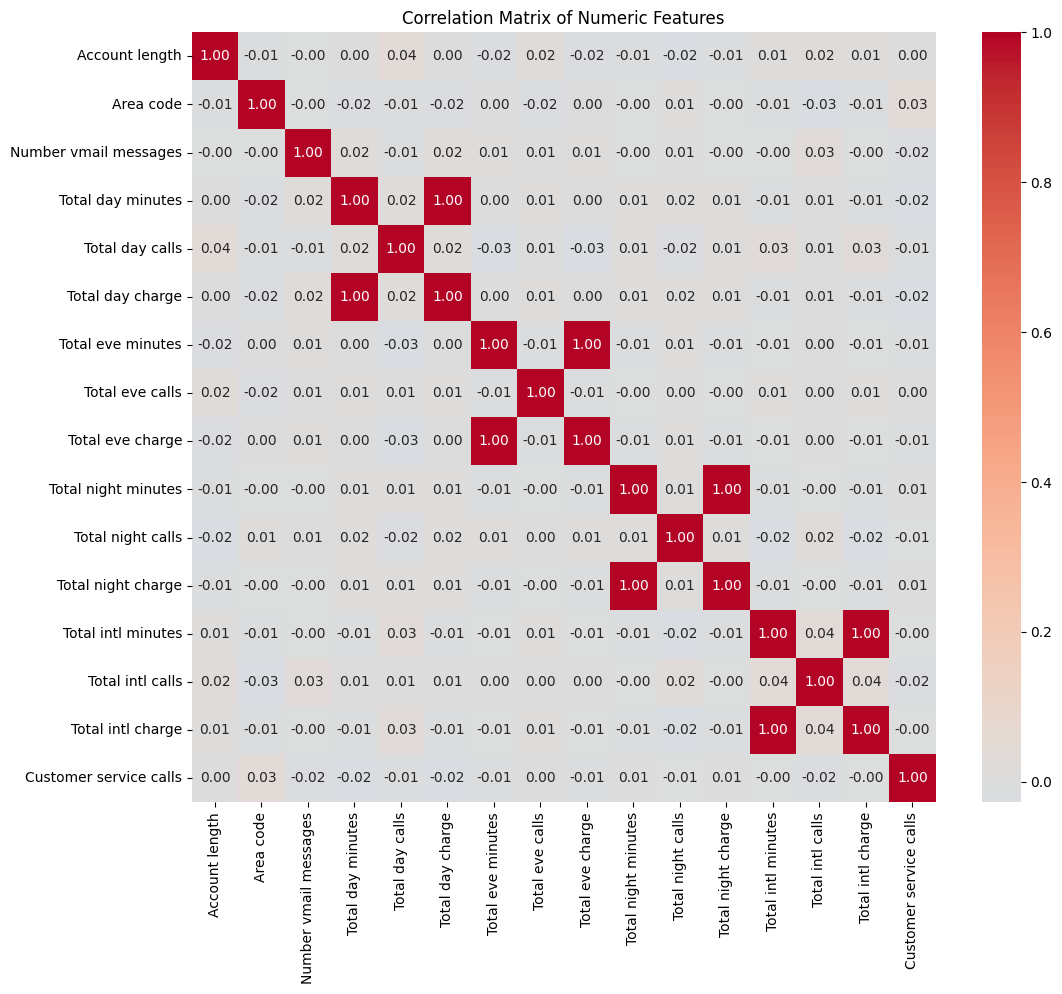

In [ ]:
# Compute correlation matrix
corr_matrix = train_ds[num_features].corr()

# Plot the heatmap with values
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:

# Columns to remove
drop_cols = [

    'Area code',


]

# Filter the variable to keep only meaningful features
num_features = [col for col in num_features if col not in drop_cols]

# Check the remaining numeric features
num_features


['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [ ]:
cat_features = ['International plan', 'Voice mail plan']

cat_summary = (
    train_ds
    .groupby(cat_features)
    .agg(customers=('Churn', 'size'), churn_rate=('Churn', 'mean'))
    .reset_index()
)

cat_summary

,International plan,Voice mail plan,customers,churn_rate
0,No,No,1738,0.134638
1,No,Yes,658,0.054711
2,Yes,No,195,0.456410
3,Yes,Yes,75,0.386667


We find out that customers with an international plan are much more likely to churn, especially if they don't have a voice mail plan. Voice mail seems to make customers a bit stickier, reducing churn. Targeting international plan users with better engagement could prevent them from leaving.

Flag for customers who call support frequently while on an international plan to see if this specific combination triggers a jump in churn.


In [ ]:
# Create a high-risk flag
train_ds['high_risk'] = (
    (train_ds['Customer service calls'] >= 4) &
    (train_ds['International plan'] == 'Yes')
)

# Check how many high-risk customers and their churn rate
high_risk_summary = (
    train_ds.groupby('high_risk')
    .agg(customers=('Churn', 'size'), churn_rate=('Churn', 'mean'))
    .reset_index()
)

high_risk_summary


,high_risk,customers,churn_rate
0,False,2644,0.141074
1,True,22,0.681818


We realize that out of customers with an international plan who called customer service more than 4 times, 68% churned.

/tmp/ipython-input-683263891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


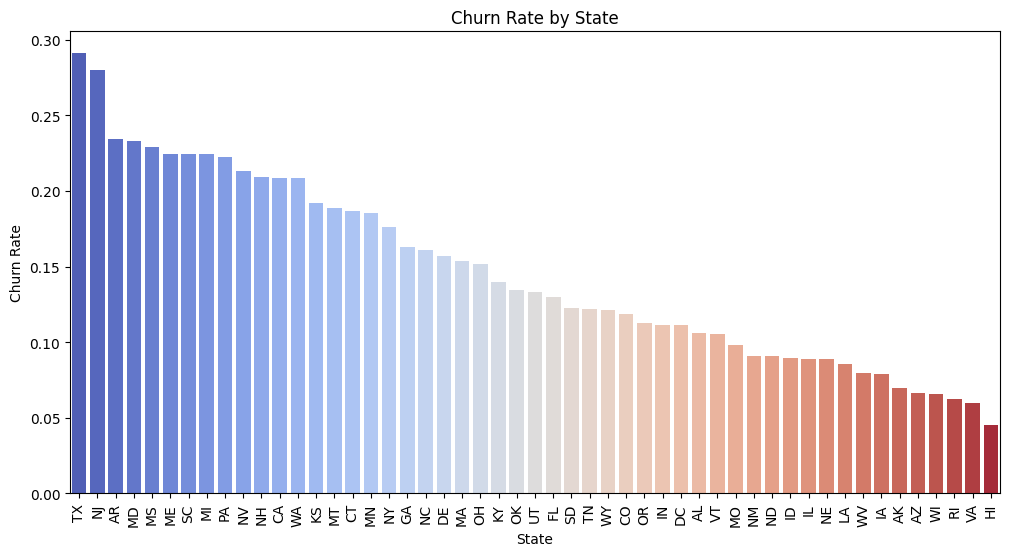

In [ ]:
# Group by State to get customer count and churn rate
state_summary = (
    train_ds
    .groupby('State')
    .agg(customers=('Churn', 'size'), churn_rate=('Churn', 'mean'))
    .reset_index()
    .sort_values('churn_rate', ascending=False)  # sort by churn rate
)

plt.figure(figsize=(12,6))
sns.barplot(
    x='State',
    y='churn_rate',
    data=state_summary.sort_values('churn_rate', ascending=False),
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by State")
plt.show()



Churn varies a lot by state. TX leads with 29% of customers leaving, followed closely by NJ at 28%, while HI has the lowest churn at just 4%.

In [ ]:
state_summary.head(10)

,State,customers,churn_rate
43,TX,55,0.290909
31,NJ,50,0.280000
2,AR,47,0.234043
20,MD,60,0.233333
25,MS,48,0.229167
21,ME,49,0.224490
40,SC,49,0.224490
22,MI,58,0.224138
38,PA,36,0.222222
33,NV,61,0.213115


Combine frequent customer service calls, international plans, and specific states with a high churn rate to identify the most critical customers

In [ ]:
# Define high-churn states
high_churn_states = ['TX', 'NJ', 'AR']

# Create super high-risk flag
train_ds['super_high_risk'] = (
    (train_ds['Customer service calls'] >= 4) &
    (train_ds['International plan'] == 'Yes') &
    (train_ds['State'].isin(high_churn_states))
)

# Summarize the super high-risk group
super_risk_summary = (
    train_ds.groupby('super_high_risk')
    .agg(customers=('Churn', 'size'), churn_rate=('Churn', 'mean'))
    .reset_index()
)

super_risk_summary


,super_high_risk,customers,churn_rate
0,False,2663,0.144949
1,True,3,0.666667


By combining customer service calls, international plan, and high-churn states, we identified 3 extreme high-risk customers. Two-thirds of them already churned.  

In [ ]:
test_ds[num_features].columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')

In [ ]:
test_ds.isna().sum().sum()

np.int64(0)

Scale all numerical features so they share a common range, ensuring the model treats every behavior fairly regardless of its original units.  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on train numeric features and transform
num_scaled_train = scaler.fit_transform(train_ds[num_features])

# Transform test numeric features using the same scaler
num_scaled_test = scaler.transform(test_ds[num_features])

# Convert back to DataFrame
num_scaled_train = pd.DataFrame(num_scaled_train, columns=num_features, index=train_ds.index)
num_scaled_test = pd.DataFrame(num_scaled_test, columns=num_features, index=test_ds.index)


Encode the categorical features using one-hot encoding to convert text labels into numbers.

In [ ]:
# Define the categorical features to encode
categorical_features = ['International plan', 'Voice mail plan']

# One-hot encode the categorical features in the training set
cat_train = pd.get_dummies(train_ds[categorical_features], drop_first=True)

# Same for the test set
cat_test = pd.get_dummies(test_ds[categorical_features], drop_first=True)


In [ ]:
# Merge scaled numeric features with encoded categorical features for training set
train_df = pd.concat([num_scaled_train, cat_train], axis=1)

# Merge scaled numeric features with encoded categorical features for test set
test_df = pd.concat([num_scaled_test, cat_test], axis=1)

# Check the shape to confirm merge
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (2666, 17)
Test shape: (667, 17)


In [ ]:
train_df.head(4)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,0.692163,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False,True
1,0.161278,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False,True
2,0.919686,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False,False
3,-0.420168,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,True,False


In [ ]:
train_df.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'International plan_Yes', 'Voice mail plan_Yes'],
      dtype='object')

Sum up total minutes across day, evening, and night to measure overall activity for each customer. It identifies the top 25% of callers as high engagement users to see if heavy usage patterns affect their decision to stay or leave.

In [ ]:
# Total usage across the day
train_ds['total_usage_minutes'] = (
    train_ds['Total day minutes'] +
    train_ds['Total eve minutes'] +
    train_ds['Total night minutes']
)

# Define high engagement as top 25%
engagement_threshold = train_ds['total_usage_minutes'].quantile(0.75)

train_ds['high_engagement'] = (
    train_ds['total_usage_minutes'] >= engagement_threshold
)


Calculate a threshold to identify the top 25% of international spenders based on their charges. It labels these customers as high spenders to help analyze if premium costs drive the most valuable users away.

In [ ]:
#define a threshold that determines the most priced customers

price_threshold = train_ds['Total intl charge'].quantile(0.75)

train_ds['high_spenders'] = (
    train_ds['Total intl charge'] >= price_threshold
)


Identifies customers who reach out to support four or more times, marking them as having high service friction.

In [ ]:
# define pple who rely or call the customer service too often

train_ds['high_service_friction'] = (
    train_ds['Customer service calls'] >= 4
)


Calculate the churn rate for high engagement users to see if heavy callers are more likely to stay or leave.

In [ ]:
train_ds.groupby('high_engagement')['Churn'].mean()


,Churn
high_engagement,
False,0.104104
True,0.269461


Calculate the average churn rate for high spenders to see if   international charges drive them to leave.

In [ ]:
train_ds.groupby('high_spenders')['Churn'].mean()


,Churn
high_spenders,
False,0.130085
True,0.191111


Calculate the churn rate for customers calling customer service often to see how that impacts retention

In [ ]:
train_ds.groupby('high_service_friction')['Churn'].mean()


,Churn
high_service_friction,
False,0.112785
True,0.528571


In [ ]:
train_ds.groupby(
    ['high_engagement', 'high_spenders', 'high_service_friction']
)['Churn'].mean().reset_index()


,high_engagement,high_spenders,high_service_friction,Churn
0,False,False,False,0.045555
1,False,False,True,0.596639
2,False,True,False,0.107368
3,False,True,True,0.558140
4,True,False,False,0.244726
5,True,False,True,0.270270
6,True,True,False,0.328767
7,True,True,True,0.545455


In [ ]:
# List of categorical columns we need
cat_cols = ['International plan_Yes', 'Voice mail plan_Yes']

# Copy from train_df to train_ds
for col in cat_cols:
    train_ds[col] = train_df[col]


# Copy from test_df to test_ds
for col in cat_cols:
    test_ds[col] = test_df[col]


Group related features into categories like engagement, pricing, and service friction to better organize the data. This helps analyze how different aspects of the customers contribute to overall churn

In [ ]:
# Engagement related features
engagement_features = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes',
    'Total day calls', 'Total eve calls', 'Total night calls',
    'Number vmail messages'
]

# High spending related features
price_features = [
    'Total day charge', 'Total eve charge', 'Total night charge',
     'Total intl calls', 'Total intl charge',
    'International plan_Yes'
]

# Service friction
service_features = [
    'Customer service calls'
]


Select specific sets of features for Logistic Regression and Random Forest models to analyze engagement patterns. This prepares the data to see how different combinations of usage minutes and call counts predict which customers fall into the high engagement group.



In [ ]:
# Logistic Regression
eng_features_lr = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes'
]

# Random Forest
eng_features_rf = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl calls','Total intl minutes',
    'Total day calls', 'Total eve calls', 'Total night calls','Number vmail messages'
]

X_train_eng_lr = train_ds[eng_features_lr]
X_train_eng_rf = train_ds[eng_features_rf]

y_train_eng = train_ds['high_engagement']


Train both a Logistic Regression and a Random Forest model to recognize patterns in high-engagement customers.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
eng_lr = LogisticRegression(max_iter=1000)
eng_lr.fit(X_train_eng_lr, y_train_eng)

# Random Forest
eng_rf = RandomForestClassifier(max_depth=4, random_state=42)
eng_rf.fit(X_train_eng_rf, y_train_eng)


RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# predictions for the training dataset
train_ds['p_engagement_lr'] = eng_lr.predict_proba(X_train_eng_lr)[:,1]
train_ds['p_engagement_rf'] = eng_rf.predict_proba(X_train_eng_rf)[:,1]

# prepare the inputs for prediction
X_test_eng_lr = test_ds[eng_features_lr]
X_test_eng_rf = test_ds[eng_features_rf]

#predict probabilities for the test dataset on engagement features
test_ds['p_engagement_lr'] = eng_lr.predict_proba(X_test_eng_lr)[:,1]
test_ds['p_engagement_rf'] = eng_rf.predict_proba(X_test_eng_rf)[:,1]

#Average the probabilities for both models to get the final probabilities
train_ds['p_engagement'] = (train_ds['p_engagement_lr'] + train_ds['p_engagement_rf']) / 2
test_ds['p_engagement'] = (test_ds['p_engagement_lr'] + test_ds['p_engagement_rf']) / 2


In [ ]:
train_ds.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,super_high_risk,total_usage_minutes,high_engagement,high_spenders,high_service_friction,International plan_Yes,Voice mail plan_Yes,p_engagement_lr,p_engagement_rf,p_engagement
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,False,707.2,True,False,False,False,True,1.000000e+00,0.611372,0.805686
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,False,611.5,False,True,False,False,True,1.629327e-24,0.116726,0.058363
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,False,527.2,False,True,False,False,False,6.706567e-89,0.148223,0.074112
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,False,558.2,False,False,False,True,False,1.413386e-65,0.272464,0.136232


<Axes: >

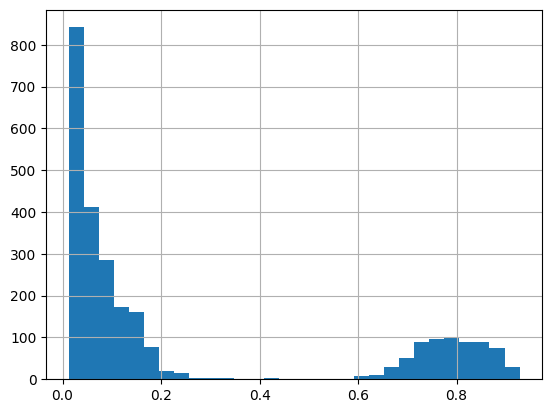

In [ ]:
# Inspect distribution
train_ds['p_engagement'].hist(bins=30)


Set up different combinations of charge and plan data to see which features best predict a high spender. This organizes the input for both models to test how well international costs versus overall spending can identify top-tier customers.



In [ ]:
# Logistic Regression
price_features_lr = [
    'Total intl charge', 'International plan_Yes'
]

# Random Forest
price_features_rf = [
    'Total day charge', 'Total eve charge', 'Total night charge',
    'Total intl charge', 'International plan_Yes'
]

X_train_price_lr = train_ds[price_features_lr]
X_train_price_rf = train_ds[price_features_rf]

y_train_price = train_ds['high_spenders']


In [ ]:

# Logistic Regression
price_lr = LogisticRegression(max_iter=1000)
price_lr.fit(X_train_price_lr, y_train_price)

# Random Forest
price_rf = RandomForestClassifier(max_depth=4, random_state=42)
price_rf.fit(X_train_price_rf, y_train_price)


RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# the training set predictions
train_ds['p_price_lr'] = price_lr.predict_proba(X_train_price_lr)[:,1]
train_ds['p_price_rf'] = price_rf.predict_proba(X_train_price_rf)[:,1]

# prepare inputs for predictions
X_test_price_lr = test_ds[price_features_lr]
X_test_price_rf = test_ds[price_features_rf]

#predict the probabilities for both models
test_ds['p_price_lr'] = price_lr.predict_proba(X_test_price_lr)[:,1]
test_ds['p_price_rf'] = price_rf.predict_proba(X_test_price_rf)[:,1]

#Average the probabilities to get the final predictions for spending
train_ds['p_price'] = (train_ds['p_price_lr'] + train_ds['p_price_rf']) / 2
test_ds['p_price'] = (test_ds['p_price_lr'] + test_ds['p_price_rf']) / 2


In [ ]:
train_ds.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,high_spenders,high_service_friction,International plan_Yes,Voice mail plan_Yes,p_engagement_lr,p_engagement_rf,p_engagement,p_price_lr,p_price_rf,p_price
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,False,False,False,True,1.000000e+00,0.611372,0.805686,9.346841e-04,0.035203,0.018069
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,True,False,False,True,1.629327e-24,0.116726,0.058363,9.952174e-01,0.913490,0.954354
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,True,False,False,False,6.706567e-89,0.148223,0.074112,5.719750e-01,0.866640,0.719308
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,False,False,True,False,1.413386e-65,0.272464,0.136232,1.085188e-08,0.039807,0.019904
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,False,False,True,False,6.051381e-108,0.039329,0.019664,1.302451e-03,0.025983,0.013643


Define which columns the models will use to predict high service friction.

In [ ]:
# Logistic Regression
service_features_lr = ['Customer service calls']

# Random Forest
service_features_rf = [
    'Customer service calls',
    'Total day calls', 'Total eve calls', 'Total night calls'
]

X_train_service_lr = train_ds[service_features_lr]
X_train_service_rf = train_ds[service_features_rf]

y_train_service = train_ds['high_service_friction']


In [ ]:
# Logistic Regression
service_lr = LogisticRegression(max_iter=1000)
service_lr.fit(X_train_service_lr, y_train_service)

# Random Forest
service_rf = RandomForestClassifier(max_depth=4, random_state=42)
service_rf.fit(X_train_service_rf, y_train_service)


RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# predictions for the training set
train_ds['p_service_lr'] = service_lr.predict_proba(X_train_service_lr)[:,1]
train_ds['p_service_rf'] = service_rf.predict_proba(X_train_service_rf)[:,1]

# inputs for  the test dataset
X_test_service_lr = test_ds[service_features_lr]
X_test_service_rf = test_ds[service_features_rf]

#predictions for the test dataset
test_ds['p_service_lr'] = service_lr.predict_proba(X_test_service_lr)[:,1]
test_ds['p_service_rf'] = service_rf.predict_proba(X_test_service_rf)[:,1]

#Average the predictions for both models
train_ds['p_service'] = (train_ds['p_service_lr'] + train_ds['p_service_rf']) / 2
test_ds['p_service'] = (test_ds['p_service_lr'] + test_ds['p_service_rf']) / 2



In [ ]:
train_ds.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Voice mail plan_Yes,p_engagement_lr,p_engagement_rf,p_engagement,p_price_lr,p_price_rf,p_price,p_service_lr,p_service_rf,p_service
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,True,1.000000e+00,0.611372,0.805686,9.346841e-04,0.035203,0.018069,2.321985e-08,0.002712,0.001356
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,True,1.629327e-24,0.116726,0.058363,9.952174e-01,0.913490,0.954354,2.321985e-08,0.002809,0.001404
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,False,6.706567e-89,0.148223,0.074112,5.719750e-01,0.866640,0.719308,2.503878e-11,0.003573,0.001786
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,False,1.413386e-65,0.272464,0.136232,1.085188e-08,0.039807,0.019904,2.153259e-05,0.002841,0.001431


Create a dataframe with just the probabilities for clustering

In [ ]:
# TRAIN
behavior_train = train_ds[['p_engagement', 'p_price', 'p_service']].copy()

# TEST
behavior_test = test_ds[['p_engagement', 'p_price', 'p_service']].copy()


Use the elbow method to find the ideal number of customer segments by testing different cluster counts. It plots how well the data points fit together as the number of groups increases.

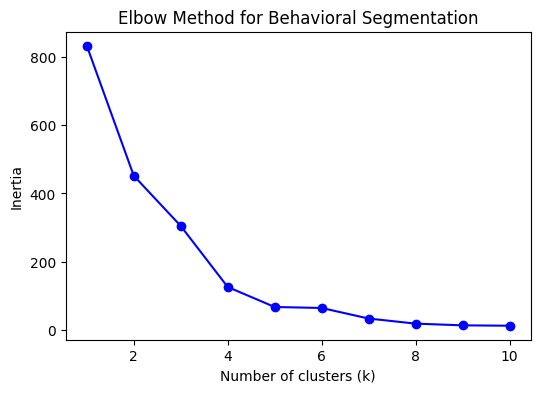

In [ ]:
from sklearn.cluster import KMeans


# Prepare features
X = behavior_train[['p_engagement', 'p_price', 'p_service']]

# Compute inertia for k=1 to 10
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Behavioral Segmentation')
plt.show()


Group customers into four distinct segments based on their engagement, spending, and service behaviors.

In [ ]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Assign clusters
behavior_train['cluster'] = kmeans.labels_
behavior_test['cluster'] = kmeans.predict(behavior_test[['p_engagement', 'p_price', 'p_service']])

In [ ]:
# Cluster profiles
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_,
                                 columns=['p_engagement', 'p_price', 'p_service'])
print(cluster_centroids)

#check how many customers fall into each segment
behavior_train['cluster'].value_counts(normalize=True)



   p_engagement   p_price  p_service
0      0.070965  0.033337   0.003219
1      0.239737  0.901513   0.003210
2      0.229675  0.261575   0.962529
3      0.784734  0.033940   0.003342


,proportion
cluster,
0,0.510878
1,0.232933
3,0.177419
2,0.078770


Map the numerical groups to human-readable labels to better describe each customer segment.

In [ ]:
train_ds['cluster'] = behavior_train['cluster']
test_ds['cluster'] = behavior_test['cluster']

cluster_labels = {
    0: "Low-risk user",
    1: "High spender",
    2: "Calls customer service quite often user",
    3: "Highly engaged user"
}

train_ds['cluster_label'] = train_ds['cluster'].map(cluster_labels)
train_ds.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,p_engagement_rf,p_engagement,p_price_lr,p_price_rf,p_price,p_service_lr,p_service_rf,p_service,cluster,cluster_label
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,0.611372,0.805686,9.346841e-04,0.035203,0.018069,2.321985e-08,0.002712,0.001356,3,Highly engaged user
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,0.116726,0.058363,9.952174e-01,0.913490,0.954354,2.321985e-08,0.002809,0.001404,1,High spender
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,0.148223,0.074112,5.719750e-01,0.866640,0.719308,2.503878e-11,0.003573,0.001786,1,High spender
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,0.272464,0.136232,1.085188e-08,0.039807,0.019904,2.153259e-05,0.002841,0.001431,0,Low-risk user
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,0.039329,0.019664,1.302451e-03,0.025983,0.013643,1.957785e-02,0.002689,0.011133,0,Low-risk user


Calculate the churn rate for each customer segment to see which group is most likely to leave.

In [ ]:
train_ds.groupby('cluster')['Churn'].mean().reset_index(name = 'churn_rate')

,cluster,churn_rate
0,0,0.045521
1,1,0.159420
2,2,0.528571
3,3,0.245243


In [ ]:
train_ds.groupby('cluster')[['p_engagement', 'p_price', 'p_service']].mean()


,p_engagement,p_price,p_service
cluster,,,
0,0.070965,0.033337,0.003219
1,0.240808,0.901212,0.003207
2,0.229675,0.261575,0.962529
3,0.784480,0.032500,0.003346


Validate the behavioral models by applying them to test data and confirming that predicted behavior distributions and churn patterns remains consistent across datasets

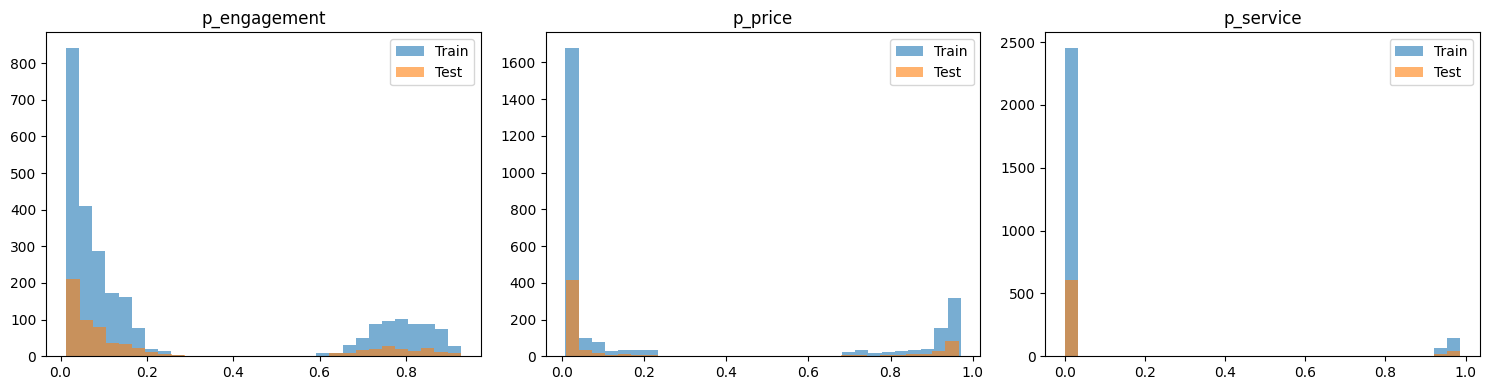

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(['p_engagement', 'p_price', 'p_service']):
    ax[i].hist(behavior_train[col], bins=30, alpha=0.6, label='Train')
    ax[i].hist(behavior_test[col], bins=30, alpha=0.6, label='Test')
    ax[i].set_title(col)
    ax[i].legend()

plt.tight_layout()
plt.show()
